# Problem statement:
The task at hand is to categorize customers into different groups based on their spending habits. The groups can be defined as General, Miser, Target, Careful, Spendthrift, and Centroid. Additionally, the customer data needs to be segmented based on their age. The objective is to identify patterns and trends in customer spending behavior and demographics to inform marketing strategies and improve customer engagement.

## Step1. Importing the libraries

In [1]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Step2. Creating & Reading the data

In [2]:
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [3]:
customers = pd.read_csv("mall_customers.csv")
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),City
0,1,Male,19,15,39.0,New York
1,2,Male,21,15,81.0,Seattle
2,3,Female,20,16,6.0,Los Angeles.
3,4,Female,23,16,77.0,Chicago.
4,5,Female,31,17,40.0,Houston.


In [4]:
for i,col in enumerate(customers.columns):
    print(f'Column number {1+i} is {col}')

Column number 1 is CustomerID
Column number 2 is Gender
Column number 3 is Age
Column number 4 is Annual Income (k$)
Column number 5 is Spending Score (1-100)
Column number 6 is City


In [5]:
#cheking shape
print("Mall Customer dataset has {} data points with {} variables each.".format(*customers.shape))

Mall Customer dataset has 1180 data points with 6 variables each.


## Step3. Data Exploration

In [6]:
customers.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,1180.000000,1180.000000,1180.000000,942.000000
mean,590.500000,37.718644,59.727119,50.152866
std,340.780966,12.703662,25.574620,25.255422
min,1.000000,18.000000,15.000000,1.000000
25%,295.750000,28.000000,40.000000,35.000000
50%,590.500000,36.000000,61.000000,50.000000
75%,885.250000,47.000000,77.000000,72.000000
max,1180.000000,70.000000,137.000000,99.000000


In [7]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1180 entries, 0 to 1179
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              1180 non-null   int64  
 1   Gender                  1180 non-null   object 
 2   Age                     1180 non-null   int64  
 3   Annual Income (k$)      1180 non-null   int64  
 4   Spending Score (1-100)  942 non-null    float64
 5   City                    1180 non-null   object 
dtypes: float64(1), int64(3), object(2)
memory usage: 55.4+ KB


In [8]:
customers.dtypes

CustomerID                  int64
Gender                     object
Age                         int64
Annual Income (k$)          int64
Spending Score (1-100)    float64
City                       object
dtype: object

In [9]:
customers.drop(customers[["CustomerID","City"]],axis=1,inplace=True)

Step4. Check if there are missing values. If yes, handle them.

In [10]:
customers.isnull().sum()

Gender                      0
Age                         0
Annual Income (k$)          0
Spending Score (1-100)    238
dtype: int64

In [11]:
# filling missing values with the mean
customers["Spending Score (1-100)"].fillna(customers["Spending Score (1-100)"].mean(),inplace=True)

In [12]:
#Checking Duplicate values across all columns
customers.duplicated().sum()

6

In [13]:
customers.drop_duplicates(inplace=True)

In [14]:
customers.duplicated().sum()

0

In [15]:
#To check if there are any special characters in place of values 
for i in customers.columns:
    print({i:customers[i].unique()})

{'Gender': array(['Male', 'Female'], dtype=object)}
{'Age': array([19, 21, 20, 23, 31, 22, 35, 64, 30, 67, 58, 24, 37, 52, 25, 46, 54,
       29, 45, 40, 60, 53, 18, 49, 42, 36, 65, 48, 50, 27, 33, 59, 47, 51,
       69, 70, 63, 43, 68, 32, 26, 57, 38, 55, 34, 66, 39, 44, 28, 56, 41])}
{'Annual Income (k$)': array([ 15,  16,  17,  18,  19,  20,  21,  23,  24,  25,  28,  29,  30,
        33,  34,  37,  38,  39,  40,  42,  43,  44,  46,  47,  48,  49,
        50,  54,  57,  58,  59,  60,  61,  62,  63,  64,  65,  67,  69,
        70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  81,  85,  86,
        87,  88,  93,  97,  98,  99, 101, 103, 113, 120, 126, 137])}
{'Spending Score (1-100)': array([39.        , 81.        ,  6.        , 77.        , 40.        ,
       76.        , 94.        ,  3.        , 72.        , 14.        ,
       99.        , 15.        , 13.        , 79.        , 35.        ,
       66.        , 29.        , 98.        , 73.        ,  5.        ,
       82.        

#Visualising The Data

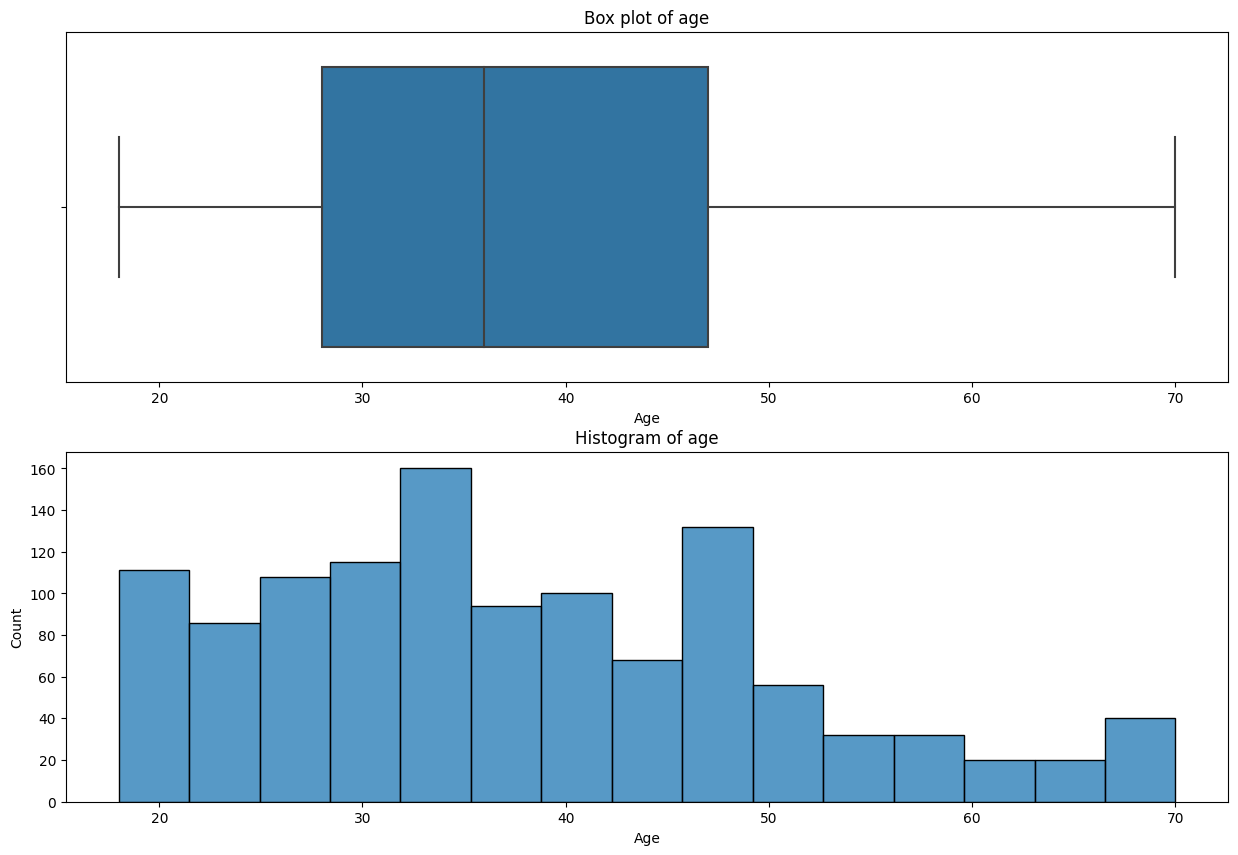

In [16]:
#Discovering Data
figure1, axis1 = plt.subplots(2, 1,figsize=(15,10))
sns.boxplot(x='Age',data=customers,ax=axis1[0])
sns.histplot(x='Age',data=customers,ax=axis1[1])
axis1[0].set_title('Box plot of age')
axis1[1].set_title('Histogram of age')
plt.show()

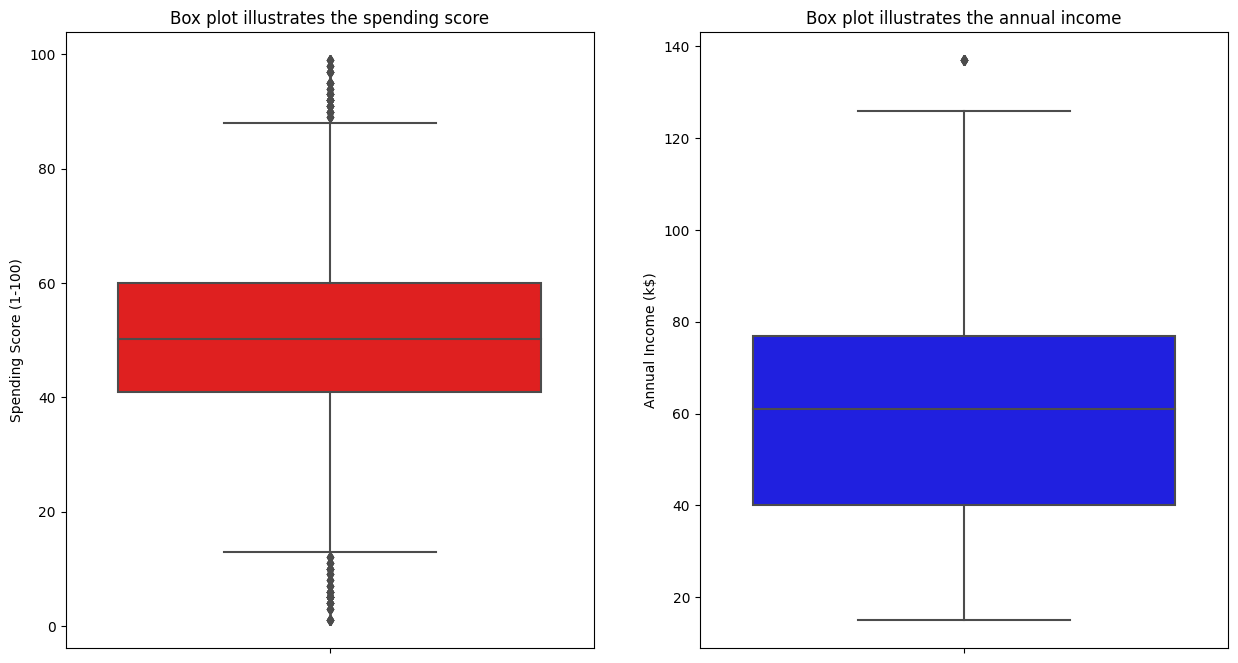

In [17]:
figure2, axis2 = plt.subplots(1, 2, figsize=(15,8))

sns.boxplot(y="Spending Score (1-100)", data=customers, color='red', ax=axis2[0])
sns.boxplot(y="Annual Income (k$)", data=customers, color='blue', ax=axis2[1])

axis2[0].set_title('Box plot illustrates the spending score')
axis2[1].set_title('Box plot illustrates the annual income')
plt.show()

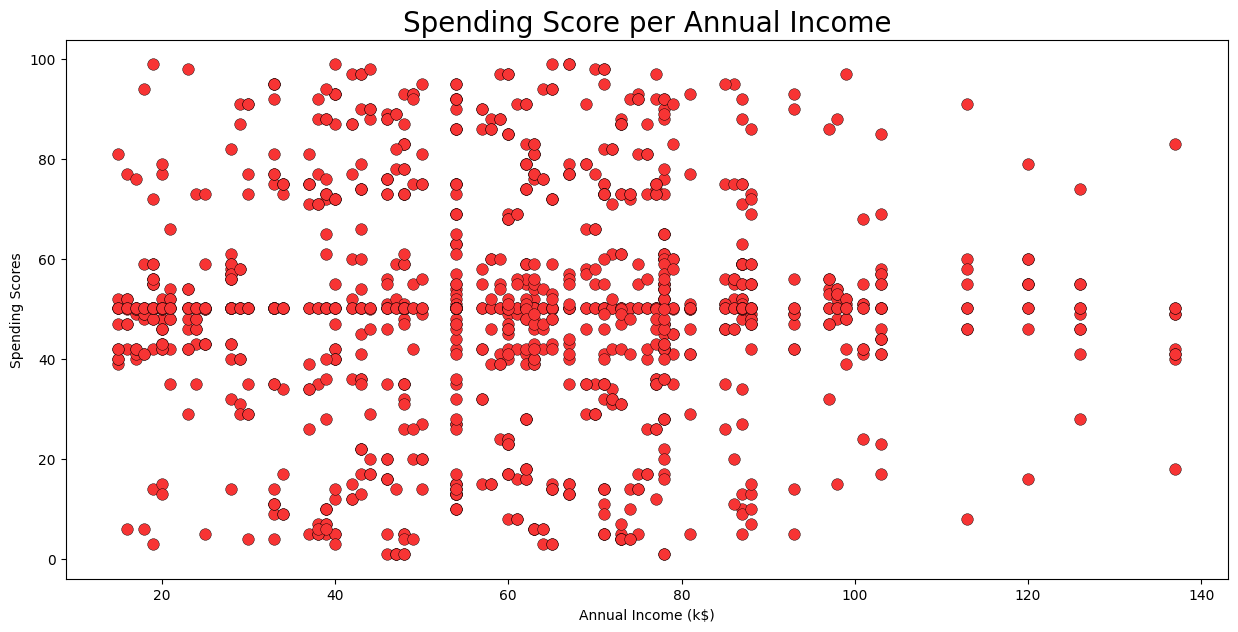

In [18]:
fig, ax = plt.subplots(figsize=(15,7))
sns.set(font_scale=1.5)
ax = sns.scatterplot(y=customers['Spending Score (1-100)'],x=customers["Annual Income (k$)"], s=70, color='#f73434', edgecolor='black', linewidth=0.3)
ax.set_ylabel('Spending Scores')
ax.set_xlabel('Annual Income (k$)')
plt.title('Spending Score per Annual Income', fontsize = 20)
plt.show()

#Generating Array of Features

In [19]:
customers

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39.0
1,Male,21,15,81.0
2,Female,20,16,6.0
3,Female,23,16,77.0
4,Female,31,17,40.0
...,...,...,...,...
1175,Female,47,88,73.0
1176,Male,48,88,10.0
1177,Male,49,88,72.0
1178,Male,50,93,5.0


In [20]:
X = customers.values[:, [2,3]]
X

array([[15, 39.0],
       [15, 81.0],
       [16, 6.0],
       ...,
       [88, 72.0],
       [93, 5.0],
       [93, 93.0]], dtype=object)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

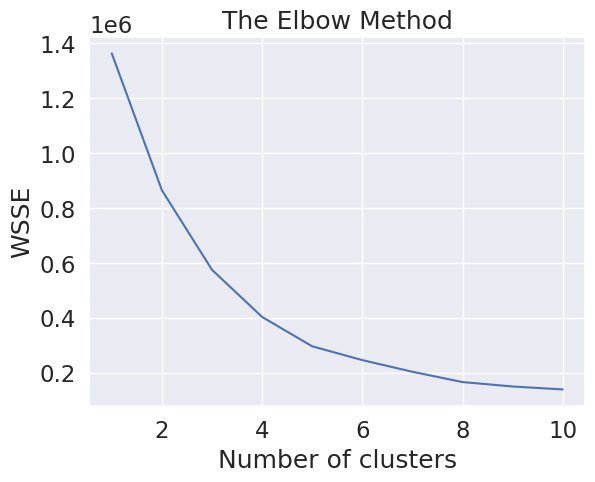

In [21]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
 
wsse = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i,  random_state = 10)
    kmeans.fit(X)
    wsse.append(kmeans.inertia_)
plt.plot(range(1, 11), wsse)
#plt.scatter(range(1, 11),wsse)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WSSE')
plt.show()

In [22]:
print(wsse)
kmeans = KMeans(n_clusters = 5,  random_state = 10)
Y_pred = kmeans.fit_predict(X)

[1363334.3029636964, 864806.6008447718, 574872.2020828861, 403069.9322354546, 296054.1653131084, 245748.7709942743, 203282.02106729647, 165714.76426813495, 149643.5675819049, 138832.36201629983]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [23]:
kmeans.inertia_
kmeans.n_iter_
customers["Clusters"]=Y_pred
customers.head(10)

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,Male,19,15,39.0,1
1,Male,21,15,81.0,1
2,Female,20,16,6.0,2
3,Female,23,16,77.0,1
4,Female,31,17,40.0,1
5,Female,22,17,76.0,1
6,Female,35,18,6.0,2
7,Female,23,18,94.0,3
8,Male,64,19,3.0,2
9,Female,30,19,72.0,1


In [24]:
customers["Clusters"]=customers.Clusters.replace({0:"General",1:"Spendrift",2:"Target",
                              3:"Miser",4:"careful"})

In [25]:
customers

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,Male,19,15,39.0,Spendrift
1,Male,21,15,81.0,Spendrift
2,Female,20,16,6.0,Target
3,Female,23,16,77.0,Spendrift
4,Female,31,17,40.0,Spendrift
...,...,...,...,...,...
1175,Female,47,88,73.0,General
1176,Male,48,88,10.0,Target
1177,Male,49,88,72.0,General
1178,Male,50,93,5.0,Target


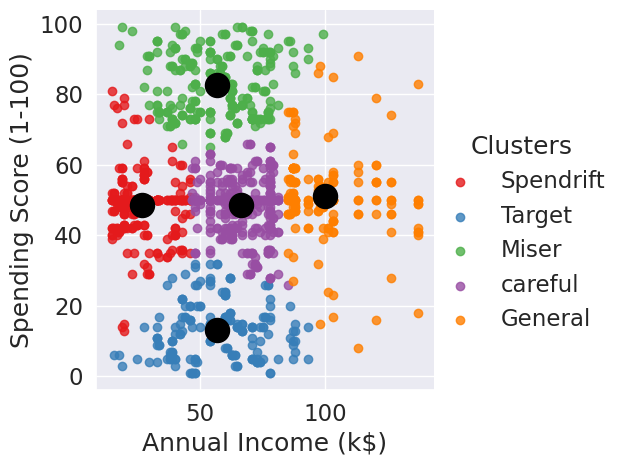

In [26]:
sns.lmplot( data=customers, x='Annual Income (k$)', y='Spending Score (1-100)',
           fit_reg=False, # No regression line
           hue='Clusters',palette="Set1")  
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
     s = 300, c = 'black')
plt.show()


This Clustering Analysis gives us a very clear insight about the different segments of the customers in the Mall. There are clearly Five segments of Customers namely Spendrift target miser careful genral based on their Annual Income and Spending Score which are reportedly the best factors/attributes to determine the segments of a customer in a Mall.

In [27]:
customers

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,Male,19,15,39.0,Spendrift
1,Male,21,15,81.0,Spendrift
2,Female,20,16,6.0,Target
3,Female,23,16,77.0,Spendrift
4,Female,31,17,40.0,Spendrift
...,...,...,...,...,...
1175,Female,47,88,73.0,General
1176,Male,48,88,10.0,Target
1177,Male,49,88,72.0,General
1178,Male,50,93,5.0,Target


#Step 8 Build Model
Finding the relation between Age and spending score

In [28]:
#Generating Array of Features
x2 = customers.iloc[:, [1,3]].values
x2.shape
 


(1174, 2)

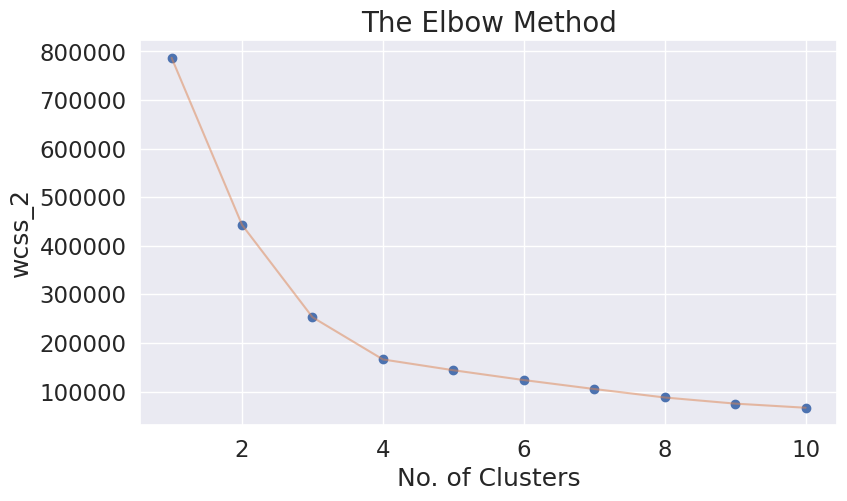

In [29]:
#Using Elbow method to find the optiminal cluster number

wcss_2 = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x2)
    wcss_2.append(km.inertia_)
 

 

plt.figure(figsize = (9 ,5))
plt.plot(np.arange(1 , 11) , wcss_2 , 'o')
plt.plot(np.arange(1 , 11) , wcss_2 , '-' , alpha = 0.5)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss_2')
plt.show()

Applying K means to the Dataset

In [30]:
kmeans_2=KMeans(n_clusters=4,init='k-means++',max_iter=300,n_init=10,random_state=0)
Y_pred_2=kmeans_2.fit_predict(x2)
Y_pred_2

array([1, 2, 0, ..., 2, 0, 2], dtype=int32)

In [31]:
labels_2= kmeans_2.labels_
centroids_2 = kmeans_2.cluster_centers_

#Visualizing the clusters : : 2-D Scatter plot

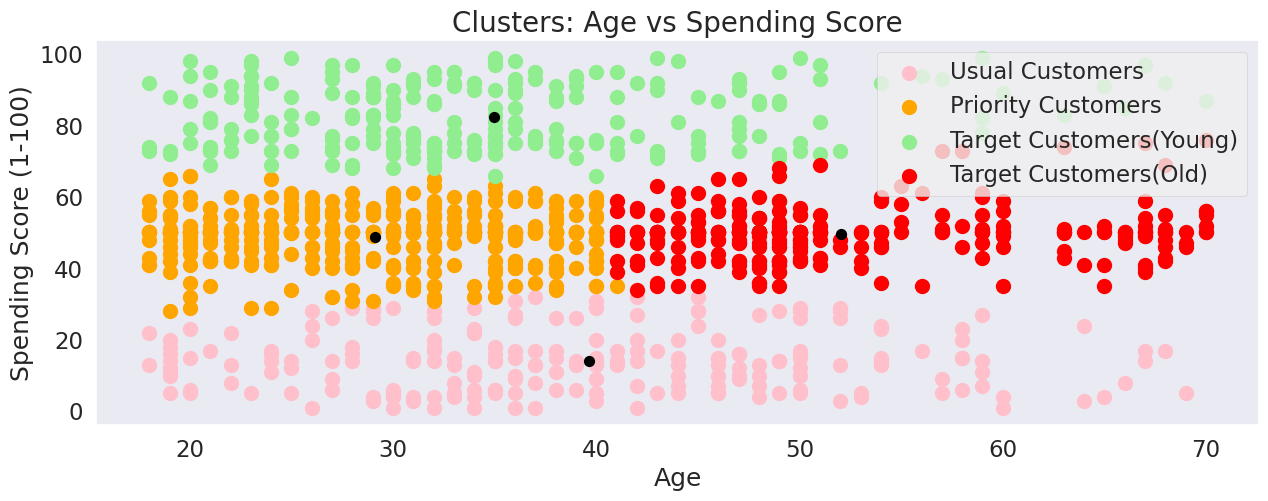

In [32]:
plt.figure(figsize=(15,5))
plt.title('Clusters: Age vs Spending Score', fontsize = 20)

plt.scatter(x2[Y_pred_2 == 0, 0], x2[Y_pred_2 == 0, 1], s = 100, c = 'pink', label = 'Usual Customers' )
plt.scatter(x2[Y_pred_2 == 1, 0], x2[Y_pred_2 == 1, 1], s = 100, c = 'orange', label = 'Priority Customers')
plt.scatter(x2[Y_pred_2 == 2, 0], x2[Y_pred_2 == 2, 1], s = 100, c = 'lightgreen', label = 'Target Customers(Young)')
plt.scatter(x2[Y_pred_2 == 3, 0], x2[Y_pred_2 == 3, 1], s = 100, c = 'red', label = 'Target Customers(Old)')
plt.scatter(centroids_2[:, 0],centroids_2[:, 1], s = 50, c = 'black')

plt.style.use('fivethirtyeight')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid()
plt.show()

In [33]:
#Generating Array of Features
x3 = customers.iloc[:, [1,3]].values
x3.shape
 

(1174, 2)

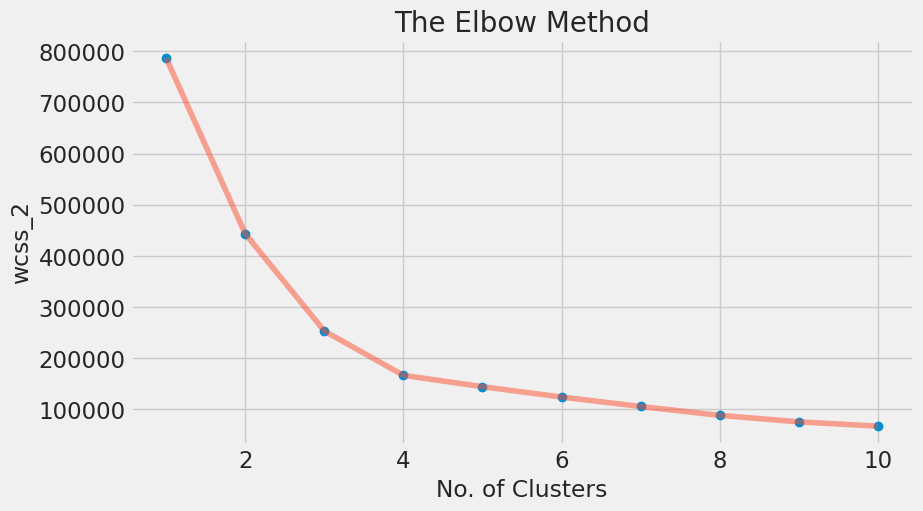

In [34]:
#Using Elbow method to find the optiminal cluster number

wcss_2 = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x3)
    wcss_2.append(km.inertia_)
 

 

plt.figure(figsize = (9 ,5))
plt.plot(np.arange(1 , 11) , wcss_2 , 'o')
plt.plot(np.arange(1 , 11) , wcss_2 , '-' , alpha = 0.5)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss_2')
plt.show()

In [35]:
kmeans_3 =KMeans(n_clusters=6,init='k-means++',max_iter=300,n_init=10,random_state=0)

Y_pred_3 = kmeans_3.fit_predict(x3)
Y_pred_3

array([3, 0, 1, ..., 4, 1, 4], dtype=int32)

In [36]:
labels_3= kmeans_3.labels_
centroids_3 = kmeans_3.cluster_centers_

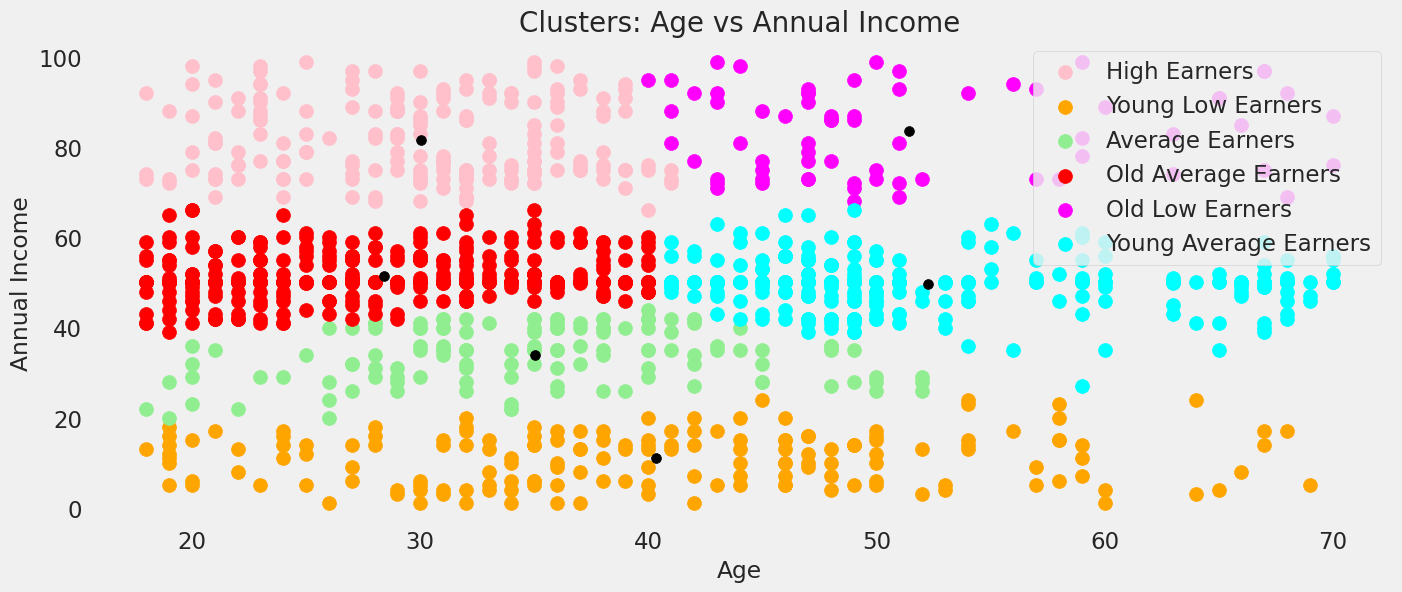

In [37]:
plt.figure(figsize=(15,6))
plt.title('Clusters: Age vs Annual Income', fontsize = 20)

plt.scatter(x3[Y_pred_3 == 0, 0], x3[Y_pred_3 == 0, 1], s = 100, c = 'pink', label = 'High Earners' )
plt.scatter(x3[Y_pred_3 == 1, 0], x3[Y_pred_3 == 1, 1], s = 100, c = 'orange', label = 'Young Low Earners')
plt.scatter(x3[Y_pred_3 == 2, 0], x3[Y_pred_3 == 2, 1], s = 100, c = 'lightgreen', label = 'Average Earners')
plt.scatter(x3[Y_pred_3 == 3, 0], x3[Y_pred_3 == 3, 1], s = 100, c = 'red', label = 'Old Average Earners')
plt.scatter(x3[Y_pred_3 == 4, 0], x3[Y_pred_3 == 4, 1], s = 100, c = 'magenta', label = 'Old Low Earners')
plt.scatter(x3[Y_pred_3 == 5, 0], x3[Y_pred_3 == 5, 1], s = 100, c = 'cyan', label = 'Young Average Earners')

plt.scatter(centroids_3[:, 0],centroids_3[:, 1], s = 50, c = 'black')

plt.style.use('fivethirtyeight')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.legend()
plt.grid()
plt.show()

# Conclusion

We have analyzed our customer base through segmentation based on their spending habits and identified the specific customer groups that are most valuable to our business. This strategy allows us to direct our resources towards satisfying the needs of these customers, thus increasing our chances of success.

In addition, we have also categorized our customers based on age and spending score. This allowed us to identify the age group with the highest potential to generate substantial revenue for our business. By understanding the behavior of our target customers, we can tailor our marketing campaigns and product offerings to cater to their preferences and improve customer satisfaction. This data-driven approach enables us to make informed decisions and optimize our business strategy, ultimately leading to long-term success.